# This notebook provides analysis tools for the Dryland Dynamics model.

## The implementation of the model is in the ``ecosystem/`` folder, that includes Python files and a .json files with initial parameters. 

The dryland dynamics model is an agent-based simulation of spatial dynamics of vegetation in arid conditions. The environment is a grid of cells, representing a square piece of land. Each cell can either be degraded {-}, empty (unoccupied) {0} or vegetated {+}. The possible transitions are:

    degraded to empty: {-} to {0}
    empty to degraded: {0} to {-}
    empty to vegetated: {0} to {+}
    vegetated to empty: {+} to {0}
In this notebook some basic properties of the model are studied including density of vegetated states, flowlength, and clustering behaviour.

In [39]:
# Import the model and necessary packages
from ecosystem.model import EcoModel
import pandas as pd
import time


In [41]:
b = 0.4  # establishment probability
m = 0.1  # mortality rate

model = EcoModel(0.4, 0.1, "ecosystem/config_file.json")

num_steps = 20 # number of simulation steps

start_time = time.time()
for i in range(num_steps):
    model.step()
    
print(time.time()-start_time)

10.66927719116211


In [42]:
stats = model.datacollector.get_model_vars_dataframe()
stats

,Degraded,Empty,Vegetated,b,flowlength,qminusminus,qminusplus,qplusplus
0,3978,3992,2030,0.369584,2.043221,0.797679,0.389491,0.205911
1,3611,4292,2097,0.370028,2.013408,0.803703,0.279844,0.260412
2,3466,4341,2193,0.369416,2.054506,0.806285,0.232786,0.310496
3,3399,4294,2307,0.369407,2.055142,0.805278,0.207051,0.351141
4,3331,4286,2383,0.370001,2.015216,0.803564,0.190446,0.372395
5,3330,4217,2453,0.370543,1.978830,0.803763,0.182701,0.396827
6,3342,4140,2518,0.370785,1.962525,0.802314,0.173319,0.413092
7,3288,4106,2606,0.371238,1.932116,0.798474,0.159568,0.428243
8,3288,3993,2719,0.372090,1.874887,0.795232,0.156185,0.451729
9,3267,3976,2757,0.372930,1.818488,0.793594,0.148803,0.457623


# Analysis of vegetation cover, its density and patchiness

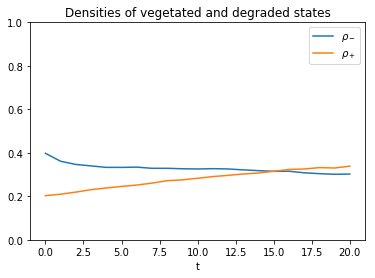

In [43]:
from matplotlib import pyplot as plt

# Plot the global densities at each time step

total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.title("Densities of vegetated and degraded states")
plt.show()

## Plotting indicators of patch formation

   ### q+|+ average probability of having vegetated neighbours next to a vegetated site
   ### q-|+  average probability of having vegetated neighbours next to a degraded site
### c++ indicator of patchiness, i.e. vegetation cover consists of clusters divided by empty or degraded sites

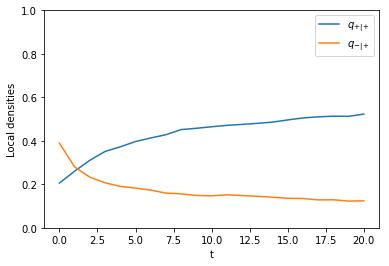

In [44]:
# Plot q+|+ and q-|+
plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qminusplus, label = r'$q_{-|+}$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.ylabel('Local densities')
plt.show()

/home/sesegma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


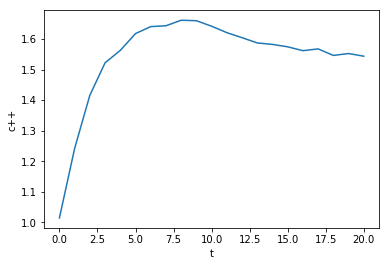

In [45]:
# Plot c++
plt.plot(stats.qplusplus/(stats.Vegetated/(total)))
plt.legend()
plt.ylabel('c++')
plt.xlabel('t')
plt.show()

## Infrequent rainfall simulation

The initial conditions and parameters used are the same as in fig. 3 of the 2013 paper by S. Kefi et al.: m = 0.1, c = 0.3, b = 0.4, d = 0.2, f = 0.8, r = 0, delta = 0. rhoplus = 0.1, rho_min = 0.8

The rain period is 10 steps, drought period is also 10 steps. These and other parameters can be reset in the accompanying .json file

### Run the cell below to gather your own data. Otherwise the data will be read from the files that are supplied 

In [46]:
# Uncomment the following lines to run the model and save the output into your own file
'''
# run model for 400 steps
model_rain = EcoModel(0.4, 0.1, "ecosystem/config_file_rain.json")
# keep track of time
start_time = time.time()
for i in range(700):
    model_rain.step()
    
print("Time simulation took:", time.time()-start_time)


#stats = model.datacollector.get_model_vars_dataframe()
#stats.to_csv(output_dir+"stats_"+period+".csv", sep='\t')
'''

'\n# run model for 400 steps\nmodel_rain = EcoModel(0.4, 0.1, "ecosystem/config_file_rain.json")\n# keep track of time\nstart_time = time.time()\nfor i in range(700):\n    model_rain.step()\n    \nprint("Time simulation took:", time.time()-start_time)\n\n\n#stats = model.datacollector.get_model_vars_dataframe()\n#stats.to_csv(output_dir+"stats_"+period+".csv", sep=\'\t\')\n'

## The following analysis shows how the state of the system depends on rainfall patterns.


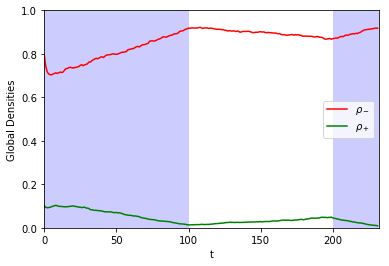

In [47]:
# read from csv's
output_dir = "output/"
period = "100" # also can be 10, 25, 50
stats = pd.read_csv(output_dir+"stats_"+period+".csv", delimiter='\t')

total = (stats.Degraded+stats.Vegetated+stats.Empty)

# throw away data after density of vegetated sites becomes too low
for i in range(len(stats.Vegetated)):
    if (stats.Vegetated[i] / total[i]) < 0.01:
        stop = i
        break
    else:
        stop = 500
stats = stats[:stop + 1]

# figure with rainfall addition
# plot the global densities at each time step
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$', c='r')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$', c='g')
plt.legend(loc='center right')
plt.ylabel('Global Densities')
plt.xlabel('t')

# add rainfall color to plot
plt.xlim([0, stop + 1])
plt.ylim([0, 1])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

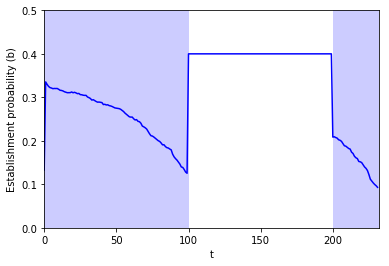

In [48]:
# plotting establishment probability
plt.plot(stats.b, label = 'b', c='b')
plt.ylabel('Establishment probability (b)')
plt.xlabel('t')
plt.xlim([0, stop + 1])
plt.ylim([0, 0.5])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

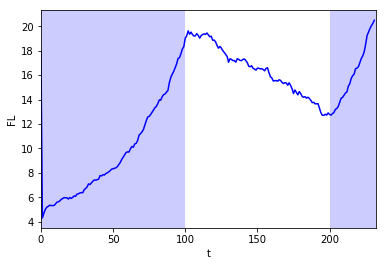

In [36]:
# plotting flowlength
plt.plot(stats.flowlength, label = 'flowlength', c='b')
plt.ylabel('FL')
plt.xlabel('t')
plt.xlim([0, stop + 1])
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()

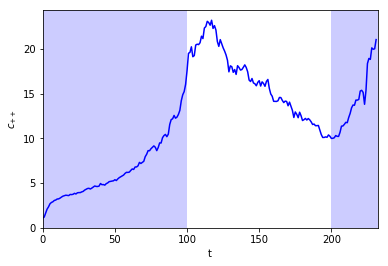

In [37]:
# plotting the clustering index
plt.plot(stats.qplusplus/(stats.Vegetated/(total)), label = r'$c_{++}$', c='b')
plt.xlim([0, stop + 1])
plt.ylabel('$c_{++}$')
plt.xlabel('t')
for i in [j for j in range(0, 500, int(period) * 2)]:
    plt.axvspan(i, i+int(period), facecolor='b', alpha=0.2)
plt.show()